# Kerr-cat qubit

In this notebook, we simulate the hamiltonian given in https://arxiv.org/abs/1907.12131:
\begin{equation}
\hat{H}_{\mathrm{cat}} / \hbar=-K \hat{a}^{\dagger 2} \hat{a}^2+\epsilon_2\left(\hat{a}^{\dagger 2}+\hat{a}^2\right),
\end{equation}
using QuTiP. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import *
from qutip import *
from IPython.display import HTML
from matplotlib import animation

# for 3d interactive display of the bloch sphere
from kaleidoscope import bloch_sphere
from matplotlib.colors import LinearSegmentedColormap, rgb2hex
from qiskit.quantum_info import Statevector, partial_trace
print("done")

done


In [28]:
k = 2*pi                  # Kerr-nonlinearity
t = linspace(0, 1.0, 101) # time
N = 15                       # qubits (photon number)
epsilon = 1

# start with a coherent state with alpha=2.0
initial_state = psi0 = coherent(N, 2.0)

a = destroy(N)               # annihilation operator
# Kerr Hamiltonian
H = -k * a.dag() * a.dag() * a * a + epsilon*(a.dag() * a.dag() + a * a)
print(initial_state)

Quantum object: dims = [[15], [1]], shape = (15, 1), type = ket
Qobj data =
[[0.13533528]
 [0.27067057]
 [0.38278599]
 [0.44200318]
 [0.4420032 ]
 [0.3953396 ]
 [0.32279381]
 [0.24400758]
 [0.17254547]
 [0.11500965]
 [0.07280249]
 [0.04372088]
 [0.02570884]
 [0.01315459]
 [0.00944713]]


evolve (https://qutip.org/docs/latest/apidoc/functions.html#module-qutip.mesolve, https://qutip.org/docs/latest/guide/dynamics/dynamics-time.html):

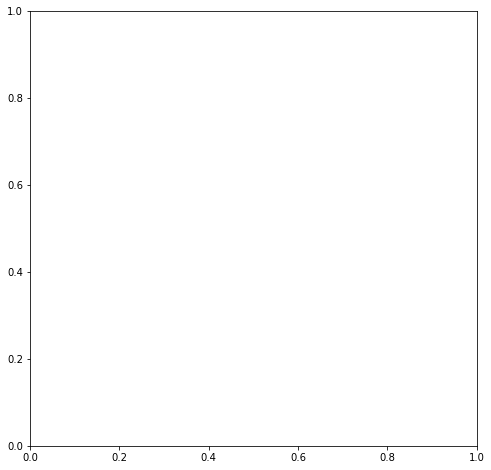

In [29]:
# evolve the state under the influence of the kerr hamiltonian. 
# pass an empty list as expecation value operators argument 
# full state of the system is described by result.states
result = mesolve(H, initial_state, t, [], [])
states = result.states

def plot_wigner(rho, fig=None, ax=None):
    """
    Plot the Wigner function and the Fock state distribution given a density matrix for
    a harmonic oscillator mode.
    """
    
    if fig is None or ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8,8))

    if isket(rho):
        rho = ket2dm(rho)
    
    xvec = linspace(-7.5,7.5,200)

    W = wigner(rho, xvec, xvec)
    wlim = abs(W).max()

    ax.contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-wlim,wlim), cmap=mpl.cm.get_cmap('RdBu'))
    ax.set_xlabel(r'$x_1$', fontsize=16)
    ax.set_ylabel(r'$x_2$', fontsize=16)

    return fig, ax


fig, ax = plt.subplots(1, 1, figsize=(8, 8))


def update(n): 
    plot_wigner(result.states[n], fig=fig, ax=ax)

# anim = animation.FuncAnimation(fig, update, frames=int(len(result.states)/2+1), blit=False)

# f = r"C:\Users\Majd\Desktop\Dartmouth\1-Cources\animation.mp4" 
# writervideo = animation.FFMpegWriter(fps=10) 
# anim.save(f, writer=writervideo)

# anim.save('animation-kerr-coherent-state-half-period.mp4', fps=10, extra_args=['-vcodec', 'libx264'])
# anim.save('animation-kerr-coherent-state-half-period.mp4', fps=10, writer="avconv", codec="libx264")

# plt.close(fig)

[Quantum object: dims = [[15], [1]], shape = (15, 1), type = ket
Qobj data =
[[0.13533528]
 [0.27067057]
 [0.38278599]
 [0.44200318]
 [0.4420032 ]
 [0.3953396 ]
 [0.32279381]
 [0.24400758]
 [0.17254547]
 [0.11500965]
 [0.07280249]
 [0.04372088]
 [0.02570884]
 [0.01315459]
 [0.00944713]], Quantum object: dims = [[15], [1]], shape = (15, 1), type = ket
Qobj data =
[[ 0.1355581 -0.00542827j]
 [ 0.27242399-0.01068491j]
 [ 0.3858634 +0.03214251j]
 [ 0.42414073+0.14391572j]
 [ 0.34356341+0.28561578j]
 [ 0.14964393+0.36699323j]
 [-0.07209772+0.31049712j]
 [-0.19445608+0.13304431j]
 [-0.15582448-0.0434637j ]
 [-0.03025419-0.09955474j]
 [ 0.0472776 -0.04219657j]
 [ 0.03116395+0.01881205j]
 [-0.00775889+0.01938824j]
 [-0.00917358-0.00334166j]
 [ 0.00324824-0.00671657j]], Quantum object: dims = [[15], [1]], shape = (15, 1), type = ket
Qobj data =
[[ 0.13627957-0.01093223j]
 [ 0.27775093-0.02038611j]
 [ 0.39262826+0.07167205j]
 [ 0.35780664+0.2903045j ]
 [ 0.06175176+0.44780215j]
 [-0.29814876+0.2

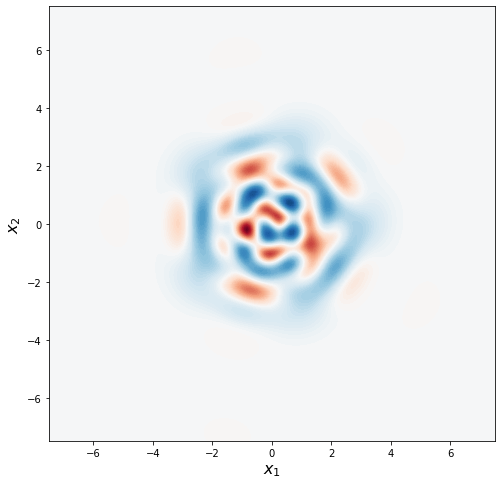

In [30]:
plot_wigner(states[20])
print(states)